# Principal Component Analysis (PCA)
What is PCA?

How is it computed?

What are the eigenvalues and eigenvectors

What does PCA represent?

What is PC loading?

What are its benefits and why do we use it?
<img src="https://raw.githubusercontent.com/abdulrahman1123/analysis_examples/main/pca_intro_1.png" width=1200 height=400 />


<img src="https://raw.githubusercontent.com/abdulrahman1123/analysis_examples/main/pca_intro_2.png" width=1200 height=400 />

<img src="https://raw.githubusercontent.com/abdulrahman1123/analysis_examples/main/pcs_plot.png" width=400 height=350 />


In [2]:
from utils import *
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.decomposition import PCA


---
## Example 1: Psychological data
### 1. Load required libraries and functions

### 2. Load your dataset and take a general look
The data set is generated for this tutorial. However, it was not completely randomly generated. I looked at the published data from (K.Peter at al. 2017) and generated a dataset similar to it. This data set has the following variables: **id**, **pain score**, **BDI score**, **negative-view-of-self score**, **physical-function score** and **disability score**.
First, take a look at the data:


In [3]:
data_dir = 'https://github.com/abdulrahman1123/analysis_examples/raw/main/dep_pain.csv'
data = pd.read_csv(data_dir)
data.head()

,id,pain,bdi,neg_view_of_self,physical_fun,disability
0,1,9.5,26.0,9,9,45.795232
1,2,4.8,29.0,8,10,40.407772
2,3,9.2,15.0,2,10,46.557437
3,4,6.5,10.0,2,7,29.836585
4,5,7.9,13.0,6,4,40.840743


### 2.1 Normalize data
It is important to normalize your data before doing PCA. Otherwise you will have meaningless results ... kind of.

In [4]:
data_scaled = StandardScaler().fit_transform(data.iloc[:,1::])
data = pd.DataFrame(data_scaled,columns = data.columns[1::])

### 2.2 Create PCA for the entire dataset in order to determine the best number of components
For this, we will plot the eigenvalues (AKA explained variance or relative importance) of each PC, and determine the best number of variables. The function "plot_pca" used here can be found in **utils.py** file.

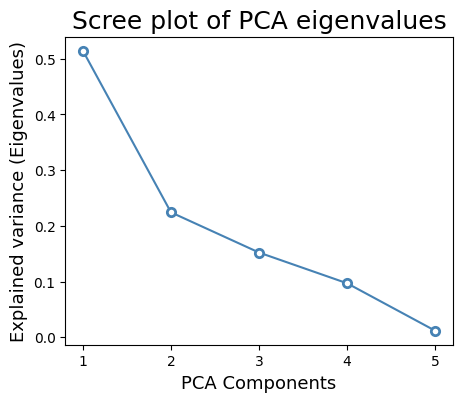

In [5]:
n_comp = data.shape[1]
pca_temp = PCA(n_components=n_comp)
data_pca_temp = pca_temp.fit_transform(data)
plot_pca(pca_temp)


#
Take a look at the figure above and decide where you can find an "elbow", where the values stop descending rapidly. Based on this, a good number of PCA components is 2. Let's proceed with that. The function "get_components" used here can be found in **utils.py** file.

,PCA1,PCA2
pain,0.210293,-0.682738
bdi,0.600261,0.174865
neg_view_of_self,0.503375,0.294027
physical_fun,0.538672,0.068452
disability,0.227836,-0.641992
Explained Var,0.514423,0.224394


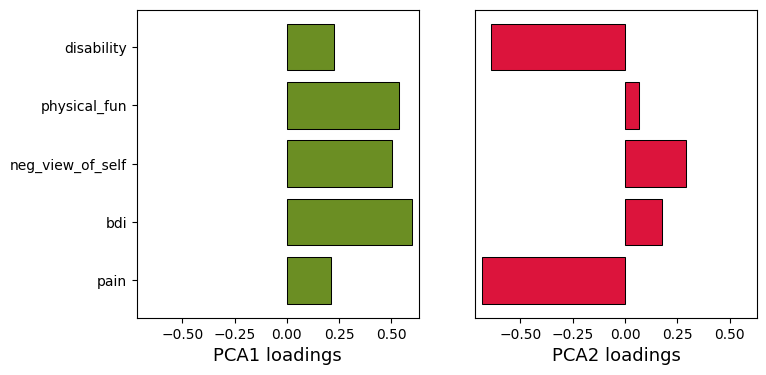

In [6]:
n_comp = 2

pca = PCA(n_components=n_comp)

data_pca = pca.fit_transform(data)

comp = get_components(pca,data.columns, True,0.35)

comp

From the figures above, we can say that we have two PCs. Looking at the "Explained Var" row, we see that these variables explain about 73% of the data, which is good percentage. This means that we can replace our 5 variables with only 2, and proceed with them.

Additionally, we can see that the first component has its highest contribution from BDI, physical function and negative view of self, which gives an idea of what this component represents, which we can roughly call "negative emotions". The second component has its highest loading from pain and disability. Thus, we can call it "pain & disability" component. It is not crucial to understand what each component means, but it would make your components more understandable to you and to you readers. However, do not worry about giving names for PCs as they sometimes do not represent anything meaningful to us.

Have a look at the final PCA data you have.

---
# Example 2: Genetics Data
The following data is published by:

Zhang Y, Tong GH, Wei XX, Chen HY et al. Identification of Five Cytotoxicity-Related Genes Involved in the Progression of Triple-Negative Breast Cancer. Front Genet 2021;12:723477. PMID: 35046993

It represents RNA sequencing results for 30 patients with cancer and 30 control samples (matched normal tissue, I am assuming from the same patients). The data are of the type FPKM (Fragments Per kilobase Per Million reads), which basically represents the expression level per gene. The higher the number the higher the gene's expression.

Let's do the same steps as above:
- have a look at the data
- scale the data
- determine the number of components that you need


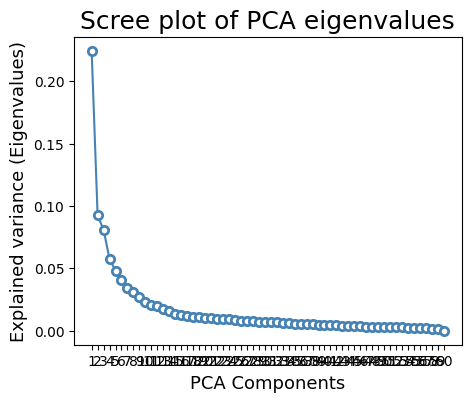

In [7]:
# read data
gendat = pd.read_csv('https://github.com/mmilano87/PCAPxDEG/raw/main/dataset/GSE183947_fpkm.csv')

# fix the data index and remove the first column
gendat.index = gendat['Unnamed: 0'].values
gendat = gendat.drop('Unnamed: 0',axis = 1)

# flip the data. Ultimately, we need each column to represent a gene, and each row to be one sample
gendat = gendat.T

# create a variable to represent the two subgroups in the data set. This will be helpful during plotting
subgroup = np.array(['Control' if item.startswith('CAP') else 'Cancer' for item in list(gendat.index)])

# MaxAbsScaler scales every feature based on its maximum absolute value
trans_gendat = MaxAbsScaler().fit_transform(gendat)
trans_gendat = pd.DataFrame(trans_gendat, index = gendat.index, columns=gendat.columns)

# determine best number of components
pca_temp = PCA(n_components=trans_gendat.shape[0])
pca_data = pca_temp.fit_transform(trans_gendat)

plot_pca(pca_temp)

#
### Perform PCA using 10 components (you can change it if you want)
Have a look at the most important 10 genes for each component.

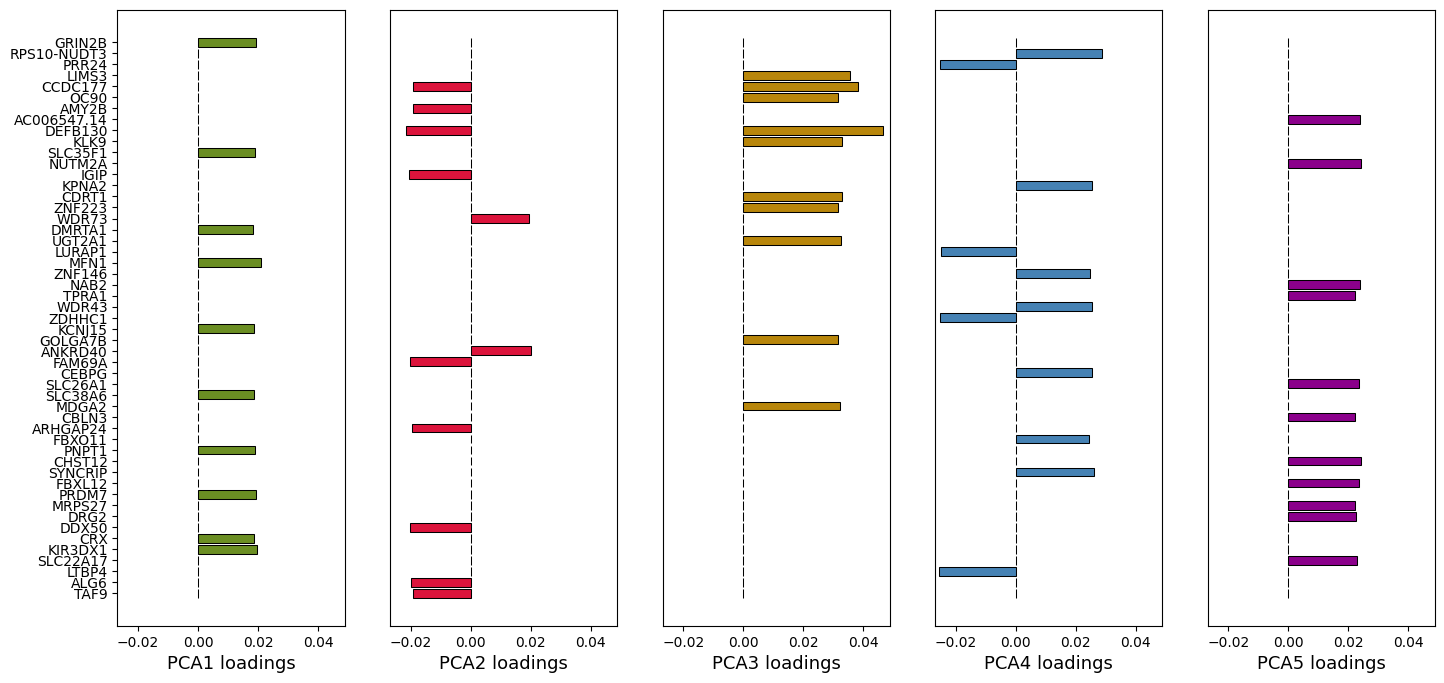

In [8]:
n_comp = 10

pca = PCA(n_components=n_comp)
pca_data = pca.fit_transform(trans_gendat)
pca_data = pd.DataFrame(pca_data, columns = ['PCA'+str(i+1) for i in range(n_comp)])
pca_data.index =gendat.index

pca_comp = get_components(pca,or_cols=trans_gendat.columns, plot_result=True,text_threshold=0.005, max_plot_feature=10, max_plot_comp=5)



### Take a look at the resulting dataframe

In [9]:
pca_data.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
CA.102548,10.545884,22.838985,-3.055187,-9.592380,0.496132,-10.165978,-1.723058,0.558818,0.021623,-0.950964
CA.104338,7.106750,19.649383,-2.978177,-8.745480,0.762883,-8.082194,-1.611837,0.930885,1.814902,-3.737668
CA.105094,18.978856,31.195974,0.931974,-5.091083,-4.549671,-16.157316,-5.380204,-4.107866,-1.183967,2.674648
CA.109745,-3.533487,5.100347,-5.695119,-2.494394,0.726889,-1.029184,-2.610868,-0.036682,0.352562,-0.058938
CA.1906415,-3.308839,4.709201,-2.018349,-1.881274,0.541046,-1.234596,2.470581,1.629224,2.794172,-4.087019


### Let's check which of these components is relevant to our Cancer samples
For this, we need to plot the most important PCs and see which of them are able to split the samples into Cancer vs Control. The first components usually have higher chance of doing this, as they carry more information than the rest of the components.

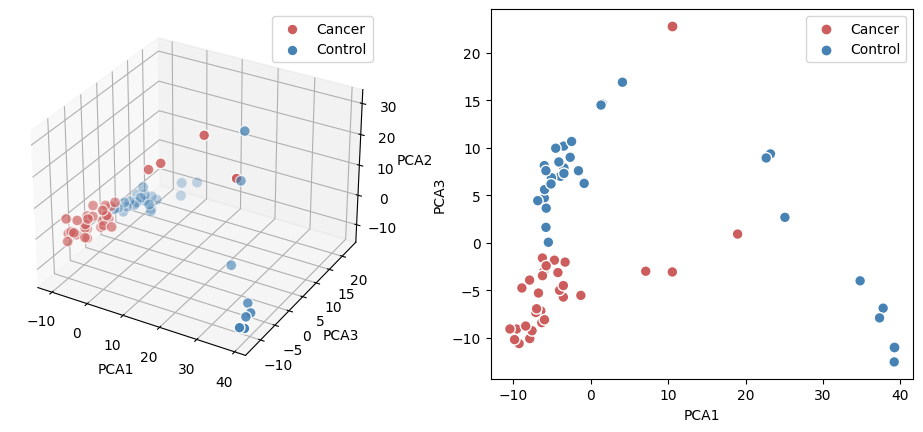

In [10]:
colors = np.where(subgroup=='Control','steelblue','indianred')

fig = plt.figure()
fig.set_figwidth(12)
ax = fig.add_subplot(121,projection = '3d')

ax.scatter(pca_data['PCA1'],pca_data['PCA3'],pca_data['PCA2'], c=colors, s = 60, edgecolors='white', linewidth = 1)
ax.set_xlabel('PCA1');ax.set_ylabel('PCA3');ax.set_zlabel('PCA2')
for group,color in zip(np.unique(subgroup),['indianred','steelblue']):
    ax.scatter(pca_data.loc[subgroup==group,'PCA1'].values[0],pca_data.loc[subgroup==group,'PCA2'].values[0],
               pca_data.loc[subgroup==group,'PCA3'].values[0],s=60,edgecolors='white',c=color, label = group)
plt.legend()

ax2 = fig.add_subplot(122)
ax2.scatter(pca_data['PCA1'],pca_data['PCA3'],c = colors, edgecolor = 'white',s = 60)
ax2.set_xlabel('PCA1');ax2.set_ylabel('PCA3')
for group,color in zip(np.unique(subgroup),['indianred','steelblue']):
    ax2.scatter(pca_data.loc[subgroup==group,'PCA1'].values[0],pca_data.loc[subgroup==group,'PCA2'].values[0],
                c=color, label = group)
plt.legend()


PC #3 seems to get the job done. So, in a sense, we can say that the information carried within PC #3 are relevant to differentiating cancer from control. This means that the RNA sequences you are testing carry information about cancer ... so, good job, this confirms that your choice of genetics are relevant to your problem, which is always good. But, that is not enough ... so, what else can you do with this?

Maybe you can:
- have a look at the genes that have the highest loading on PC3, consider them cancer-related and do further analysis on them
- confirm other findings you already have using other analysis methods
- What else?
----
### Excercise: 
Extract the 0.2% most-expressed (99.8 percentile) and lowest-expressed (0.2 percentile) genes.

Sample code is provided below

In [39]:
pca_3_dat = pca_comp['PCA3'].iloc[0:-1]
# To extract the values above the 99.8th percentile, modify this line:
th_999 = np.percentile(pca_3_dat,99.0)
print(th_999)
print(np.max(pca_3_dat))
# For the lowest 0.1%, modify this line
th_001 = np.percentile(pca_3_dat,1)
highest_expressed = pca_3_dat.loc[pca_3_dat>th_999].index
lowest_expressed = pca_3_dat.loc[pca_3_dat<th_001].index

print('Genes of highest expression: ', highest_expressed)
print('Genes of lowest expression: ', lowest_expressed)

0.018044378256518796
0.0464846134457528
Genes of highest expression:  Index(['RBM5', 'SLC7A2', 'MEOX1', 'IDS', 'DCN', 'CALCOCO1', 'EHD2', 'PREX2',
       'LIMA1', 'EIF4B',
       ...
       'KRBOX1', 'CFB', 'ECSCR', 'SEPP1', 'OC90', 'C8orf88', 'CCDC177',
       'LIMS3', 'ITGB3', 'FXYD1'],
      dtype='object', length=203)
Genes of lowest expression:  Index(['METTL13', 'NCAPD2', 'ANLN', 'DDX11', 'POLA2', 'OPN3', 'POLD1', 'MCM10',
       'ASPM', 'PITX1',
       ...
       'VARS', 'ALG3', 'SLC12A8', 'HIST1H2AM', 'FAM203A', 'KIFC1', 'MIF',
       'PDXP', 'MEX3A', 'MRPL12'],
      dtype='object', length=203)


While this might not be the best way to find the most relevant genes. It can be a start point for your anlaysis, or a confirmation of other analyses. For example, getting back to the original paper of Zhang Y et al. 2021 ([found here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8762060/)), we find that the authors identified the differentially expressed genes (DEG), which takes logFC and p-value into account. You can open [this link](https://www.ncbi.nlm.nih.gov/core/lw/2.0/html/tileshop_pmc/tileshop_pmc_inline.html?title=Click%20on%20image%20to%20zoom&p=PMC3&id=8762060_fgene-12-723477-g001.jpg) to see their results.

In this analysis, they grouped the genes into two based on their expression levels and found that they group into two groups. Each group corresponds nicely with the type of sample (cancerous vs control). We can prove this by looking at the PCA3 value of the DEGs as follows:

(-0.75, 52.0)

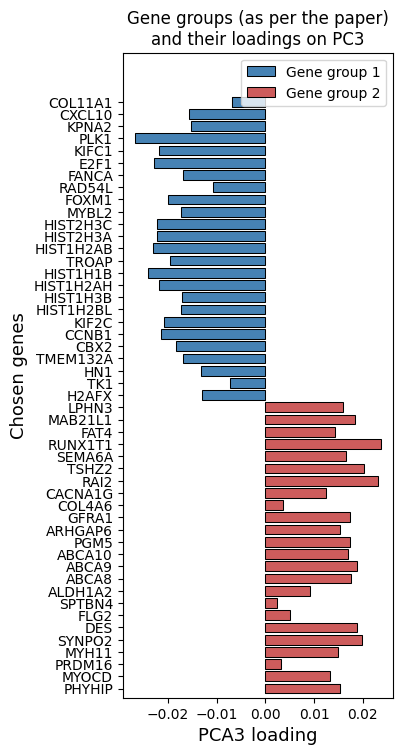

In [50]:
gene_group_1 = ['COL11A1','CXCL10','KPNA2','PLK1','KIFC1','E2F1','FANCA','RAD54L','FOXM1','MYBL2','HIST2H3C','HIST2H3A',
               'HIST1H2AB','TROAP','HIST1H1B','HIST1H2AH','HIST1H3B','HIST1H2BL','KIF2C','CCNB1','CBX2','TMEM132A','HN1','TK1','H2AFX']
gene_group_2 = ['LPHN3','MAB21L1','FAT4','RUNX1T1','SEMA6A','TSHZ2','RAI2','CACNA1G','COL4A6','GFRA1','ARHGAP6',
               'PGM5', 'ABCA10','ABCA9','ABCA8','ALDH1A2','SPTBN4','FLG2','DES','SYNPO2','MYH11','PRDM16','MYOCD','PHYHIP']


gene_group_1.reverse()
gene_group_2.reverse()
inc_genes = gene_group_2+gene_group_1


plt_comp = pca_comp.loc[inc_genes,'PCA3']
colors = ['indianred']*len(gene_group_2)+['steelblue']*len(gene_group_1)
fig, ax = plt.subplots(figsize=(4, 7.5))
ax.barh(plt_comp.index, plt_comp, color=colors, edgecolor='black', linewidth=0.75)
ax.barh(plt_comp.index[-1], plt_comp.iloc[-1], color=colors[-1], edgecolor='black', linewidth=0.75, label = 'Gene group 1')
ax.barh(plt_comp.index[0], plt_comp.iloc[0], color=colors[0], edgecolor='black', linewidth=0.75, label = 'Gene group 2')
ax.set_title('Gene groups (as per the paper)\nand their loadings on PC3')
ax.set_xlabel('PCA3 loading', size=13)
ax.set_ylabel('Chosen genes', size=13)
plt.legend()
plt.subplots_adjust(left=0.3, right=0.975, top=0.93, bottom=0.07)
ax.set_ylim(-0.75,len(inc_genes)+3)